In [1]:
import numpy as np
import pandas  as pd
import seaborn as sns
import scipy.stats as sts
import random
import matplotlib.pyplot as plt

In [2]:
x = np.linspace(0, 1, 252)
S0 = 100
mu = 10/100
sigma = 18/100
T = 1
n_steps = 252

dt = T/n_steps

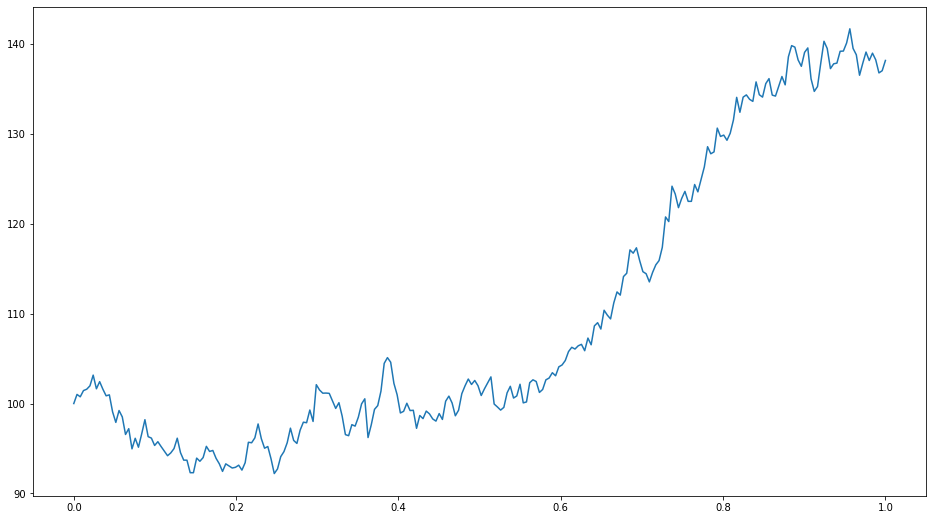

In [3]:
#Criando a trajetória de uma única opção 

import math

St_GBM = [S0]


for i in range(0,251):
    W = np.random.normal()
    SG = St_GBM[i] * np.exp((mu - (sigma ** 2)/2) * (dt) + sigma * W * math.sqrt(dt))
    St_GBM.append(SG)
    
plt.figure(figsize = (16,9))
plt.plot(x, St_GBM)
plt.show()

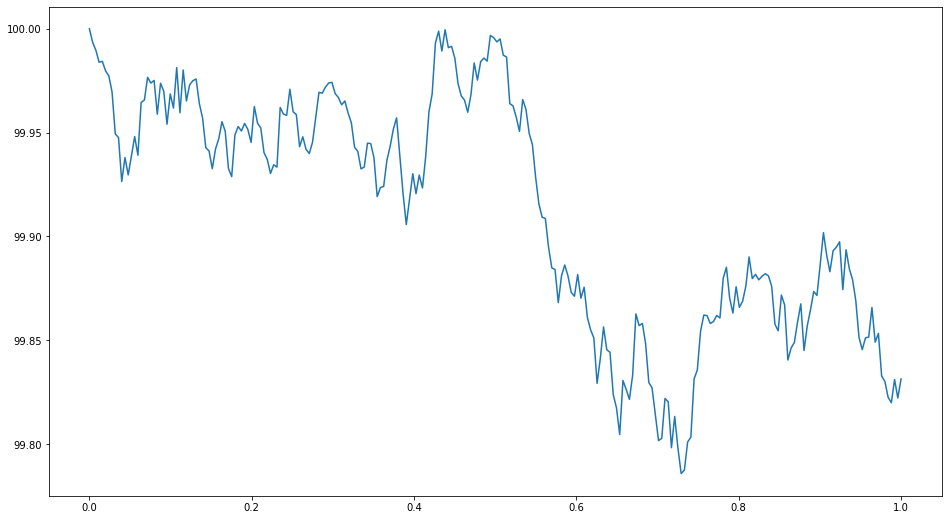

In [4]:
#Obtendo os dados para equação aritmética


St_ABM = [S0]


for i in range(0,251):
    W = np.random.normal()
    SA = St_ABM[i] + (mu * dt) + (sigma * W * math.sqrt(dt))
    St_ABM.append(SA)
    
plt.figure(figsize = (16,9))
plt.plot(x, St_ABM)
plt.show()


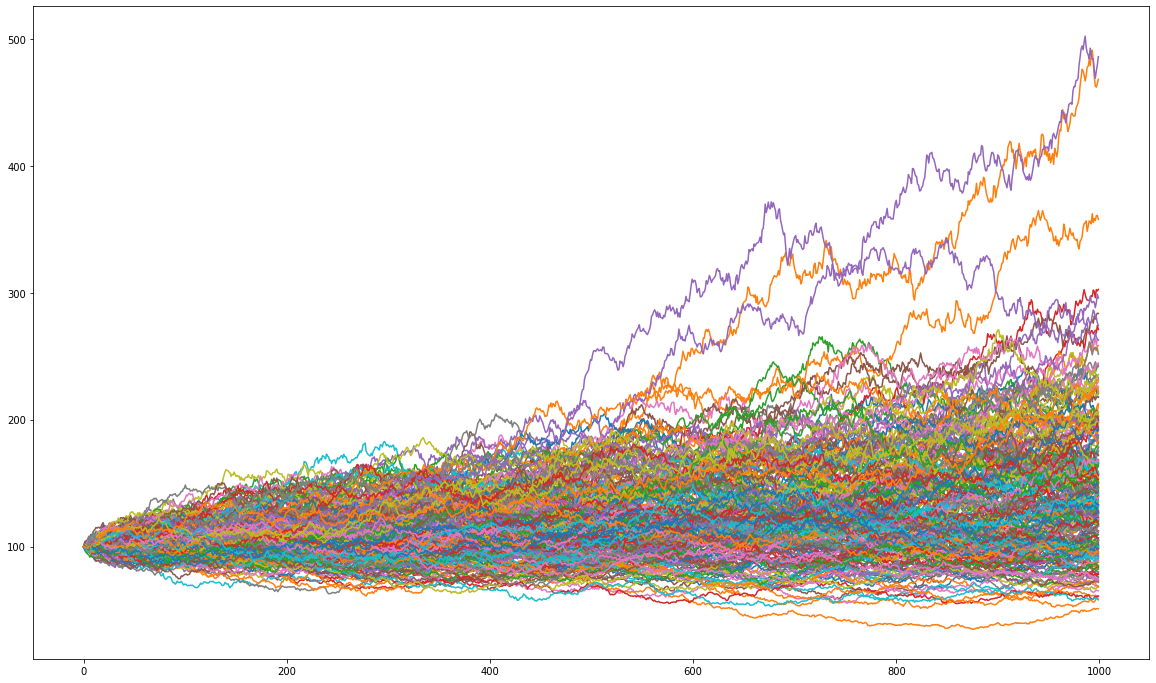

In [5]:
#Gerando 10 mil simulações 


numT = 10000

W_sim = []  #Lista para armazenar os arrays das simulações dos choques

for i in range(numT):    
    W = np.random.normal(0, 1, 252)
    W_sim.append(W)


S01 = [100]*252
St_GBM_sim = [S01] #Lista com as 10 mil trajetórias de preços que serão plotadas

for i in range(0,999):
    St_GBM = St_GBM_sim[i] * np.exp((mu - (sigma ** 2)/2) * (dt) + sigma * W_sim[i+1] * math.sqrt(dt))
    St_GBM_sim.append(St_GBM)

plt.figure(figsize=(20,12))
plt.subplot()
plt.plot(St_GBM_sim)
plt.show()

In [6]:
#Pegando o último elemento de cada uma das 10000 simulações

St_GBM_sim_final = []

for j in range(0,999):
    St_GBM_sim_final.append(St_GBM_sim[-j][-1])


#Agora, esses valores simulados serão trazidos a valor presente usando-se
#mu como a taxa livre de risco

valor_presente = []

for i in St_GBM_sim_final:
    valor_presente.append(i*np.exp(-mu*T))
    


#Agora, para encontrar o preço da opção, será feita a média dos valores presentes


for i in valor_presente:
    soma = sum(i for i in valor_presente)
    preco = soma/10000
    
print(f'O preco da opção será de {preco}')  
    



O preco da opção será de 13.069054974163416


In [7]:
#Calculando o Var para a amostra simulada
var_per = 0.05

var = np.percentile(St_GBM_sim_final, var_per)

print(f'O var será de {var}')

O var será de 98.79286839487224
